In [1]:
from mcbj import *
import plots
import filter_traces

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, StrMethodFormatter
import numpy as np
# import pandas as pd

In [2]:
date = "23_07_07"
home_folder = Path(f'//DATACENTER/BreakJunction_group/BJ_Data/{date}')

In [3]:
my_colors = np.vstack((colormaps['inferno'](np.linspace(0.2, 1, 5)[0]),
                       np.array([[0, 0, 0, 1]]),
                       colormaps['inferno'](np.linspace(0.2, 1, 5)),
                       colormaps['inferno'](np.linspace(0.2, 1, 5))[-2::-1]))

In [4]:
trace_pair = TracePair(1, load_from=home_folder)

In [5]:
trace_pair.rate

5.0

In [6]:
trace_pair.sample_rate

50000.0

In [7]:
trace_pair.R_serial

100300.0

In [8]:
trace_pair.conductance_pull
trace_pair.piezo_pull

array([13.46935272, 13.46945219, 13.46955165, ..., 42.95990668,
       42.96000615, 42.96010561])

<AxesSubplot:xlabel='Piezo [V]', ylabel='Conductance [$G_{0}$]'>

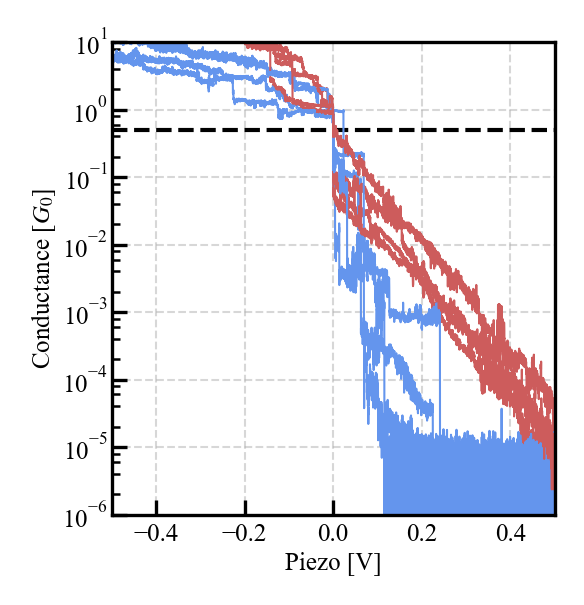

In [9]:
trace_pair = TracePair(500, load_from=home_folder)
trace_pair.align_trace(0.5)
ax = trace_pair.plot_trace_pair(dpi=300, xlim=(-0.5, 0.5), aligned=True)
ax.axhline(0.5, ls='--', lw=1, c='k')

trace_pair = TracePair(501, load_from=home_folder)
trace_pair.align_trace(0.5)
trace_pair.plot_trace_pair(dpi=300, xlim=(-0.5, 0.5), aligned=True, ax=ax)
trace_pair = TracePair(502, load_from=home_folder)
trace_pair.align_trace(0.5)
trace_pair.plot_trace_pair(dpi=300, xlim=(-0.5, 0.5), aligned=True, ax=ax)
trace_pair = TracePair(503, load_from=home_folder)
trace_pair.align_trace(0.5)
trace_pair.plot_trace_pair(dpi=300, xlim=(-0.5, 0.5), aligned=True, ax=ax)

In [10]:
hist = Histogram(folder=home_folder,
                 start_trace=500, end_trace=1200,
                 conductance_range=(1e-5, 10),
                 conductance_log_scale=True,
                 conductance_bins_num=100,
                 conductance_bins_mode='total')

hist.calc_stats(align_at=1e-5, interpolate=True,
                range_pull=(-0.5, 1),
                range_push=(-0.5, 1.5))

  0%|          | 0/701 [00:00<?, ?it/s]

Pull 2D histogram created from 701 traces
Push 2D histogram created from 701 traces


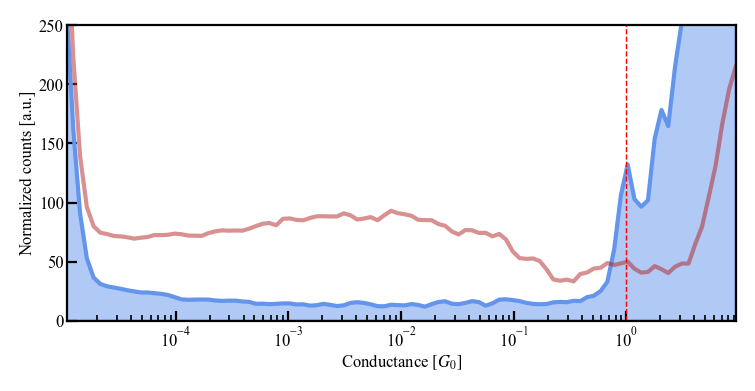

In [11]:
ax = hist.plot_hist_1d(dpi=200)
ax.set_ylim(0, 250)
ax.axvline(1, ls='--', lw=0.5, c='r')

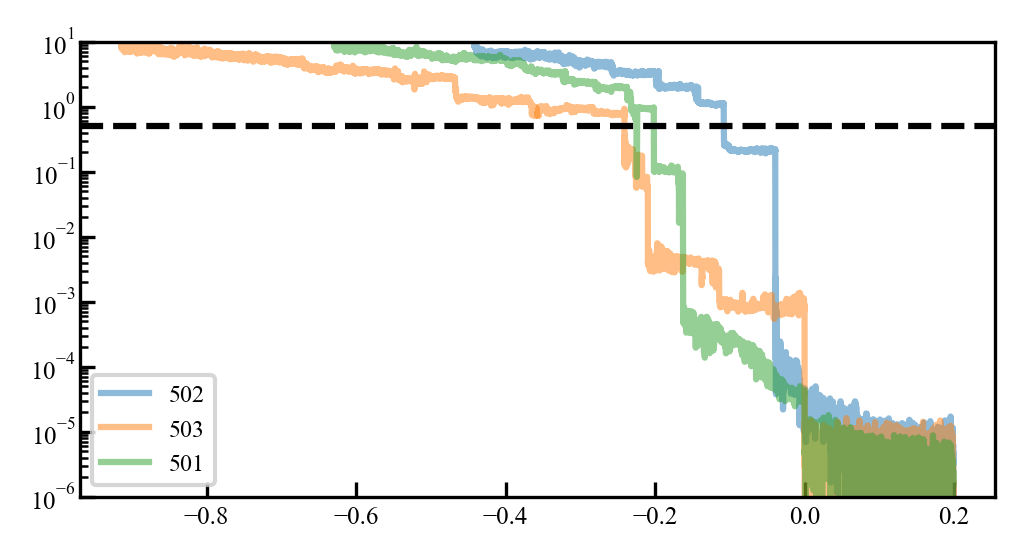

In [12]:
ax = hist.plot_example_traces((502, 503, 501), shift=0, alpha=0.5)
ax.axhline(0.5, c='k', ls='--')

In [13]:
hist.calc_hist_2d(align_at=1e-5)

  0%|          | 0/701 [00:00<?, ?it/s]

2D histogram pull direction created from 701 traces
2D histogram push direction created from 701 traces


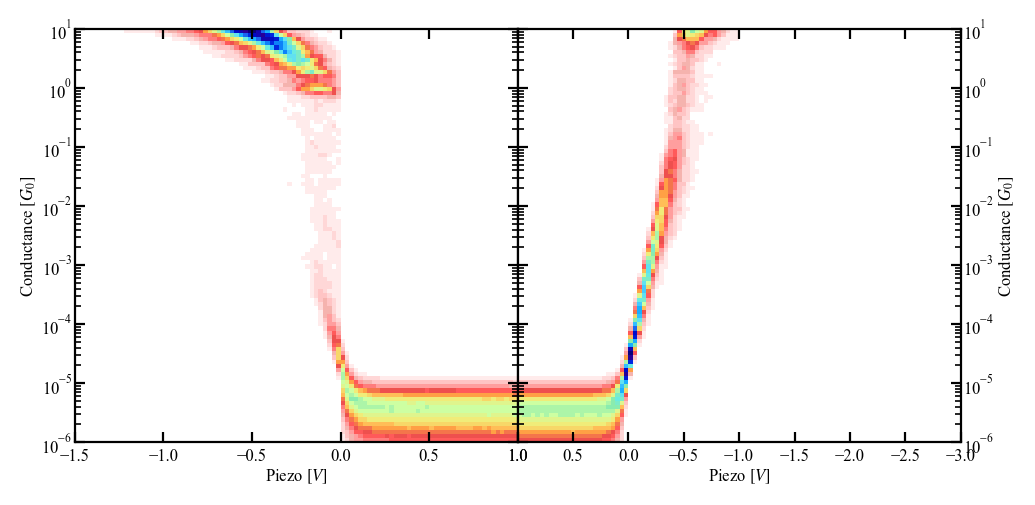

In [14]:
ax = hist.plot_hist_2d_both(dpi=200)

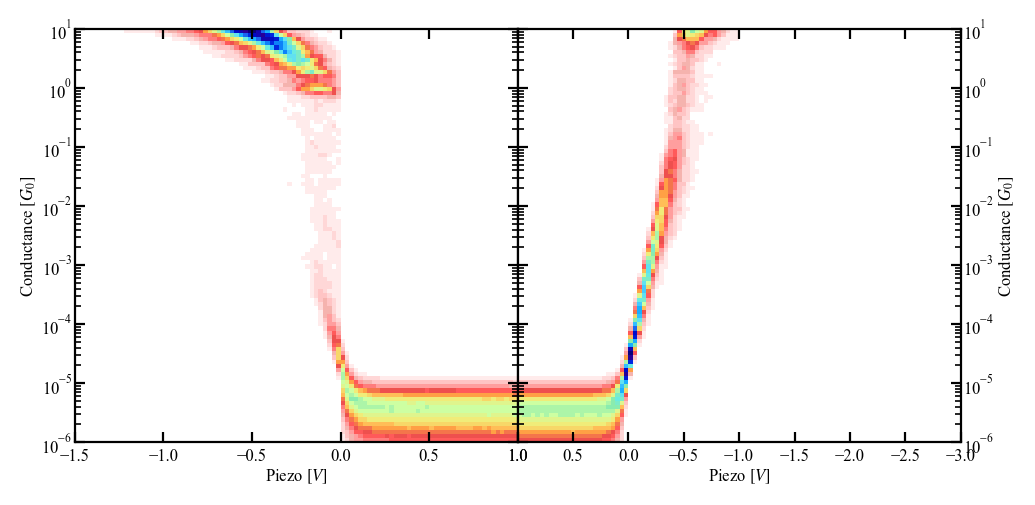

In [15]:
ax = hist.plot_hist_2d_both(dpi=200)

In [16]:
hist.save_histogram('hist_100.h5')

Histogram saved to \\DATACENTER\BreakJunction_group\BJ_Data\23_07_07\results\histograms\hist_100.h5.


In [17]:
hist_loaded = Histogram(folder = home_folder, load_from=home_folder.joinpath('results/histograms/hist_100.h5'))

(0.0, 250.0)

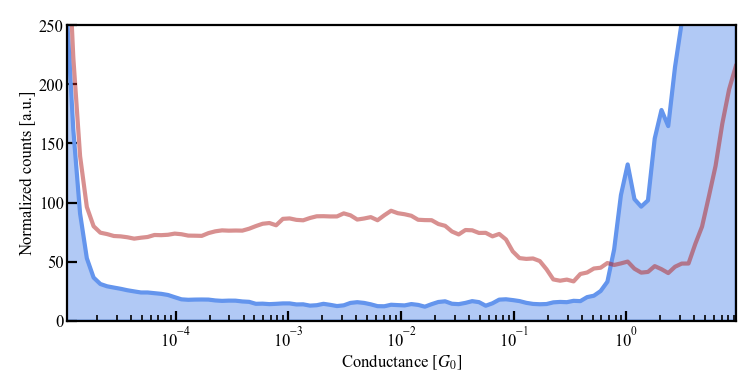

In [18]:
ax =hist_loaded.plot_hist_1d(dpi=200)
ax.set_ylim(0, 250)

(<AxesSubplot:xlabel='Piezo $[V]$', ylabel='Conductance $[G_{0}]$'>,
 <AxesSubplot:xlabel='Piezo $[V]$', ylabel='Conductance $[G_{0}]$'>)

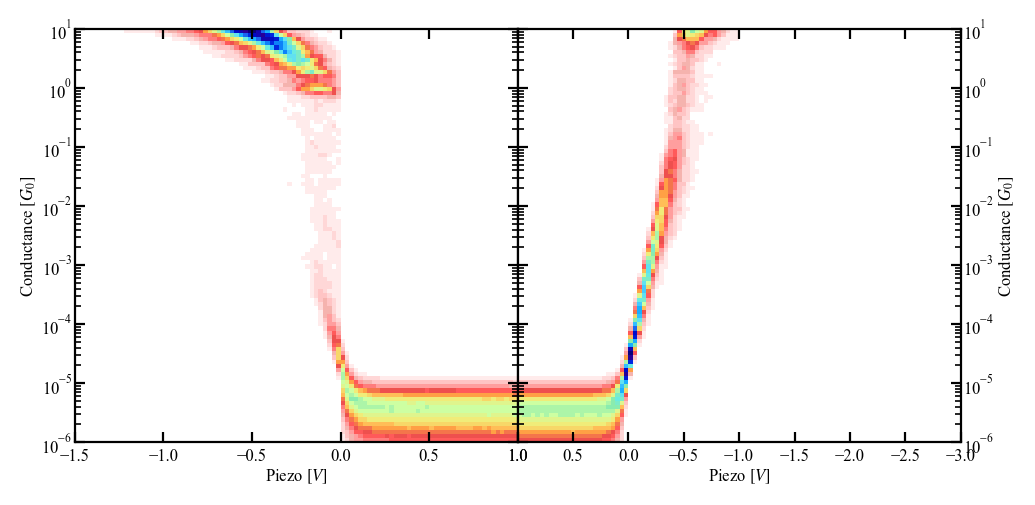

In [23]:
hist_loaded.plot_hist_2d_both(dpi=200)

### Filtering traces that did not break during the hold measurement

In [55]:
total_num = 9380-1212+1
print(total_num)

8169


In [6]:
# did_not_break_pull, did_not_break_push = filter_traces.filter_hold(home_folder,
#                                                                    filter_condition=filter_traces.does_not_break_array,
#                                                                    start_trace=1212, end_trace=9380,
#                                                                    bias_offset=0, r_serial_ohm=100_300,
#                                                                    min_step_len=20_000)
# with open(home_folder.joinpath('results/did_not_break_pull.npy'), 'wb') as f:
#     np.save(f, did_not_break_pull)
    
# with open(home_folder.joinpath('results/did_not_break_push.npy'), 'wb') as f:
#     np.save(f, did_not_break_push)

In [7]:
with open(home_folder.joinpath('results/did_not_break_pull.npy'), 'rb') as f:
    did_not_break_pull = np.load(f)
    
with open(home_folder.joinpath('results/did_not_break_push.npy'), 'rb') as f:
    did_not_break_push = np.load(f)

In [8]:
print(f'pull: {len(did_not_break_pull)}, {len(did_not_break_pull)/total_num*100}%')
print(f'push: {len(did_not_break_push)}, {len(did_not_break_push)/total_num*100}%')

pull: 4110, 50.3121557106133%
push: 8071, 98.80034275921166%


### Filtering traces where the conductance on the two 200 mV bias plateaus do not differ more than a factor of 2

In [9]:
# stable_pull, _ = filter_traces.filter_hold(home_folder, filter_condition=filter_traces.conductances_close,
#                                            traces=did_not_break_pull,
#                                            bias_offset=0, r_serial_ohm=100_300,
#                                            min_step_len=20_000, max_ratio=2, plateaus=(0, -1))

# _, stable_push = filter_traces.filter_hold(home_folder, filter_condition=filter_traces.conductances_close,
#                                            traces=did_not_break_push,
#                                            bias_offset=0, r_serial_ohm=100_300,
#                                            min_step_len=20_000, max_ratio=2, plateaus=(0, -1))

# with open(home_folder.joinpath('results/stable_pull.npy'), 'wb') as f:
#     np.save(f, stable_pull)
    
# with open(home_folder.joinpath('results/stable_push.npy'), 'wb') as f:
#     np.save(f, stable_push)

In [10]:
with open(home_folder.joinpath('results/stable_pull.npy'), 'rb') as f:
    stable_pull = np.load(f)
    
with open(home_folder.joinpath('results/stable_push.npy'), 'rb') as f:
    stable_push = np.load(f)

In [11]:
print(f'pull: {len(stable_pull)}, {len(stable_pull)/total_num*100}%')
print(f'push: {len(stable_push)}, {len(stable_push)/total_num*100}%')

pull: 4110, 50.3121557106133%
push: 8071, 98.80034275921166%


### Filtering traces with nice I(V)s

We are interested in the I(V) curves where the up-down sweeps overlap nicely. The difference between the up-down sweeps is calculated with the function `filter_traces.iv_difference`

In [37]:
def get_iv_diff(trace: int, direction: str):
    try:
        hold_trace = HoldTrace(trace, load_from=home_folder, bias_offset=0,
                               r_serial_ohm=100_300, min_step_len=5_000, min_height=1, iv=0)
        # push_diff.append(filter_traces.iv_difference(hold_trace, direction='push', smoothing=100))
        # traces.append(hold_trace.trace_num)
        return filter_traces.iv_difference(hold_trace, direction=direction, smoothing=100)
    except MeasurementOverflow:
        return -1

In [38]:
push_diff = np.array(list(map(get_iv_diff, stable_push, ['push']*len(stable_push))))

D:\mcbj_stmbj\mcbj.py:2387: MeasurementOverflow: Current overflow during I(V) cycle, in push direction.
  warnings.warn('Current overflow during I(V) cycle, in push direction.', MeasurementOverflow)
D:\mcbj_stmbj\mcbj.py:2384: MeasurementOverflow: Current overflow during I(V) cycle, in pull direction.
  warnings.warn('Current overflow during I(V) cycle, in pull direction.', MeasurementOverflow)


In [39]:
pull_diff = np.array(list(map(get_iv_diff, stable_pull, ['pull']*len(stable_pull))))

667 8.264155618882418


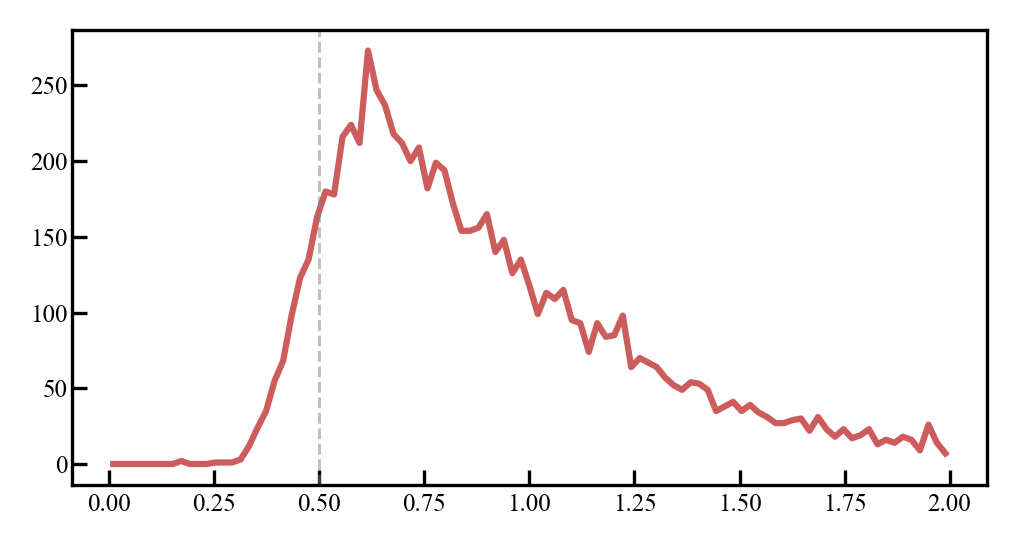

In [40]:
push_diff_bins, push_diff_hist = utils.calc_hist_1d_single(data=push_diff, xrange=(0, 2),
                                                           xbins_num=100, log_scale=False)

print(len(push_diff[push_diff < 0.5]), len(push_diff[push_diff < 0.5])/len(push_diff)*100)

fig, ax = plt.subplots(1, figsize=utils.cm2inch(10, 5), dpi=300)
ax.plot(push_diff_bins, push_diff_hist, 'indianred')
ax.axvline(0.5, c='grey', alpha=0.5, ls='--', lw=0.7)

220 5.35279805352798


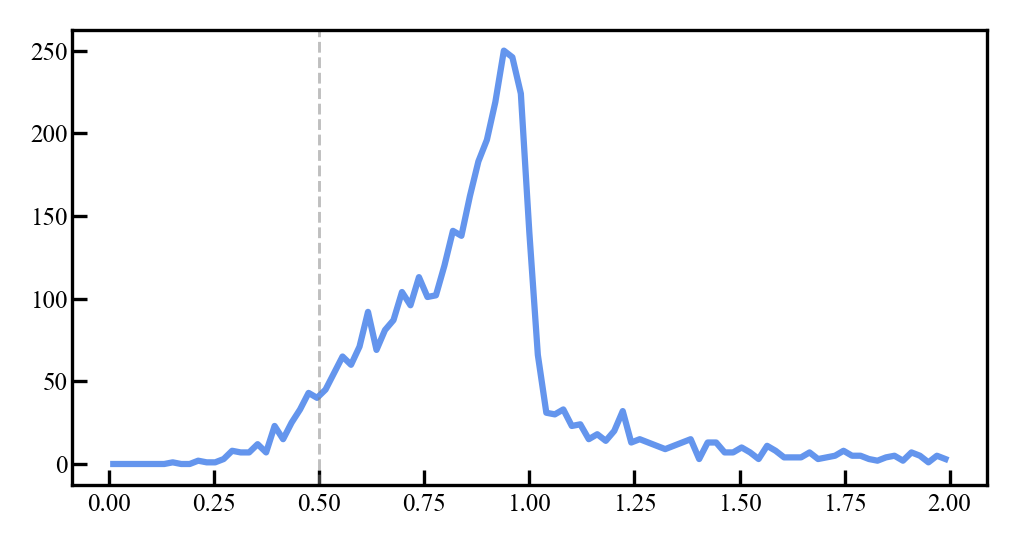

In [41]:
pull_diff_bins, pull_diff_hist = utils.calc_hist_1d_single(data=pull_diff, xrange=(0, 2),
                                                           xbins_num=100, log_scale=False)

print(len(pull_diff[pull_diff < 0.5]), len(pull_diff[pull_diff < 0.5])/len(pull_diff)*100)

fig, ax = plt.subplots(1, figsize=utils.cm2inch(10, 5), dpi=300)
ax.plot(pull_diff_bins, pull_diff_hist, 'cornflowerblue')
ax.axvline(0.5, c='grey', alpha=0.5, ls='--', lw=0.7)

In [42]:
# iv_good_push = stable_push[np.where(np.logical_and(push_diff > 0, push_diff < 0.5))[0]]
# iv_good_pull = stable_pull[np.where(np.logical_and(pull_diff > 0, pull_diff < 0.5))[0]]

# with open(home_folder.joinpath('results/iv_good_pull.npy'), 'wb') as f:
#     np.save(f, iv_good_pull)
    
# with open(home_folder.joinpath('results/iv_good_push.npy'), 'wb') as f:
#     np.save(f, iv_good_push)

In [53]:
with open(home_folder.joinpath('results/iv_good_pull.npy'), 'rb') as f:
    iv_good_pull = np.load(f)
    
with open(home_folder.joinpath('results/iv_good_push.npy'), 'rb') as f:
    iv_good_push = np.load(f)

In [56]:
print(f'pull: {len(iv_good_pull)}, {len(iv_good_pull)/total_num*100}%')
print(f'push: {len(iv_good_push)}, {len(iv_good_push)/total_num*100}%')

pull: 220, 2.693108091565675%
push: 667, 8.16501407761048%


In [3]:
# filtered_push_diff = push_diff[push_diff < 0.5]
# filtered_pull_diff = pull_diff[pull_diff < 0.5]
# print(iv_good_push[np.argsort(filtered_push_diff)])
# print(filtered_push_diff[np.argsort(filtered_push_diff)])

### Filtering traces where the up-down I(V) sweeps overlap

In [77]:
count=-1

In [95]:
count+=1

In [2]:
# which_trace = iv_good_pull[np.argsort(filtered_pull_diff)][count]

# for which_trace in tqdm(iv_good_pull):

#     hold_trace = HoldTrace(which_trace,
#                            load_from=home_folder, bias_offset=0,
#                            r_serial_ohm=100300, min_step_len=5_000, min_height=1, iv=0)

#     trace_pair = TracePair(which_trace, load_from=home_folder)

#     hold_trace.analyse_hold_trace(num_of_fft=5, subtract_bg=False)

#     # print(hold_trace.bias_steps.shape)

#     fig, ax_trace, ax_hold, par_hold, ax_iv, ax_psd = \
#         plots.plot_ivs_scheme_one(trace_pair=trace_pair, hold_trace=hold_trace, direction='pull', color_list=my_colors, vline_color='white',
#                                   smoothing=10, which_psds=None)

#     ax_noise_1 = ax_iv.inset_axes(bounds=(0.05, 0.55, 0.4, 0.4))
#     ax_noise_2 = ax_iv.inset_axes(bounds=(0.55, 0.05, 0.4, 0.4))

#     for i in range(len(my_colors)):
#         ax_iv.plot(hold_trace.bias_steps[i], hold_trace.avg_current_on_step_pull[i], marker='o', ls='', ms=2.5, markeredgecolor='k', markeredgewidth=0.2, c=my_colors[i])
#         ax_noise_1.plot(hold_trace.bias_steps[i], hold_trace.areas_pull[i], marker='o', ls='', ms=2.5, markeredgecolor='k', markeredgewidth=0.2, c=my_colors[i])
#         ax_noise_2.plot(hold_trace.bias_steps[i], hold_trace.current_noise_pull[i], marker='o', ls='', ms=2.5, markeredgecolor='k', markeredgewidth=0.2, c=my_colors[i])

#     ax_noise_1.set_xlabel('Bias [V]')
#     ax_noise_2.set_xlabel('Bias [V]')

#     ax_noise_1.set_ylabel(r'$\Delta I^2 [\mathrm{A}^2]$')
#     ax_noise_2.set_ylabel(r'$\Delta I/I$')

#     ax_noise_1.set_yscale('log')
#     ax_noise_2.set_yscale('log')

#     ax_hold.set_ylim(-1*max(hold_trace.hold_current_pull), max(hold_trace.hold_current_pull))

#     fig.suptitle(f'Trace {which_trace}', fontsize=6)
    
#     plt.savefig(home_folder.joinpath(f'results/figs/pull_{which_trace}.png'), bbox_inches='tight')
#     plt.close()

#     # print(filter_traces.iv_difference(hold_trace, direction='pull', smoothing=100))

In [118]:
count_push=0

In [135]:
count_push+=1

In [1]:
# which_trace = iv_good_push[np.argsort(filtered_push_diff)][count_push]


# for which_trace in tqdm(iv_good_push):
#     hold_trace = HoldTrace(which_trace,
#                            load_from=home_folder, bias_offset=0,
#                            r_serial_ohm=100300, min_step_len=5_000, min_height=1, iv=0)

#     trace_pair = TracePair(which_trace, load_from=home_folder)

#     hold_trace.analyse_hold_trace(num_of_fft=5, subtract_bg=False)

#     # print(hold_trace.bias_steps.shape)

#     fig, ax_trace, ax_hold, par_hold, ax_iv, ax_psd = \
#         plots.plot_ivs_scheme_one(trace_pair=trace_pair, hold_trace=hold_trace, direction='push', color_list=my_colors, vline_color='white',
#                                   smoothing=10, which_psds=None)

#     ax_noise_1 = ax_iv.inset_axes(bounds=(0.05, 0.55, 0.4, 0.4))
#     ax_noise_2 = ax_iv.inset_axes(bounds=(0.55, 0.05, 0.4, 0.4))

#     for i in range(len(my_colors)):
#         ax_iv.plot(hold_trace.bias_steps[i], hold_trace.avg_current_on_step_push[i], marker='o', ls='', ms=2.5, markeredgecolor='k', markeredgewidth=0.2, c=my_colors[i])
#         ax_noise_1.plot(hold_trace.bias_steps[i], hold_trace.areas_push[i], marker='o', ls='', ms=2.5, markeredgecolor='k', markeredgewidth=0.2, c=my_colors[i])
#         ax_noise_2.plot(hold_trace.bias_steps[i], hold_trace.current_noise_push[i], marker='o', ls='', ms=2.5, markeredgecolor='k', markeredgewidth=0.2, c=my_colors[i])

#     ax_noise_1.set_xlabel('Bias [V]', fontsize=4)
#     ax_noise_2.set_xlabel('Bias [V]', fontsize=4)

#     ax_noise_1.set_ylabel(r'$\Delta I^2 [\mathrm{A}^2]$', fontsize=4)
#     ax_noise_2.set_ylabel(r'$\Delta I/I$', fontsize=4)

#     ax_noise_1.set_yscale('log')
#     ax_noise_2.set_yscale('log')

#     ax_noise_1.xaxis.set_ticks_position('both')
#     ax_noise_1.yaxis.tick_right()
#     ax_noise_1.yaxis.set_label_position('right')
#     ax_noise_1.yaxis.set_ticks_position('both')

#     ax_noise_2.xaxis.tick_top()
#     ax_noise_2.xaxis.set_label_position('top')
#     ax_noise_2.xaxis.set_ticks_position('both')
#     ax_noise_2.yaxis.set_ticks_position('both')

#     ax_noise_1.tick_params(axis='x', labelsize=4)
#     ax_noise_1.tick_params(axis='y', labelsize=4)
#     ax_noise_2.tick_params(axis='x', labelsize=4)
#     ax_noise_2.tick_params(axis='y', labelsize=4)

#     ax_hold.set_ylim(-1*max(hold_trace.hold_current_push), max(hold_trace.hold_current_push))

#     fig.suptitle(f'Trace {which_trace}', fontsize=6)
#     plt.savefig(home_folder.joinpath(f'results/figs/push_{which_trace}.png'), bbox_inches='tight')
#     plt.close()

#     # print(filter_traces.iv_difference(hold_trace, direction='push', smoothing=100))

Text(0.5, 0.98, 'Trace 1662')

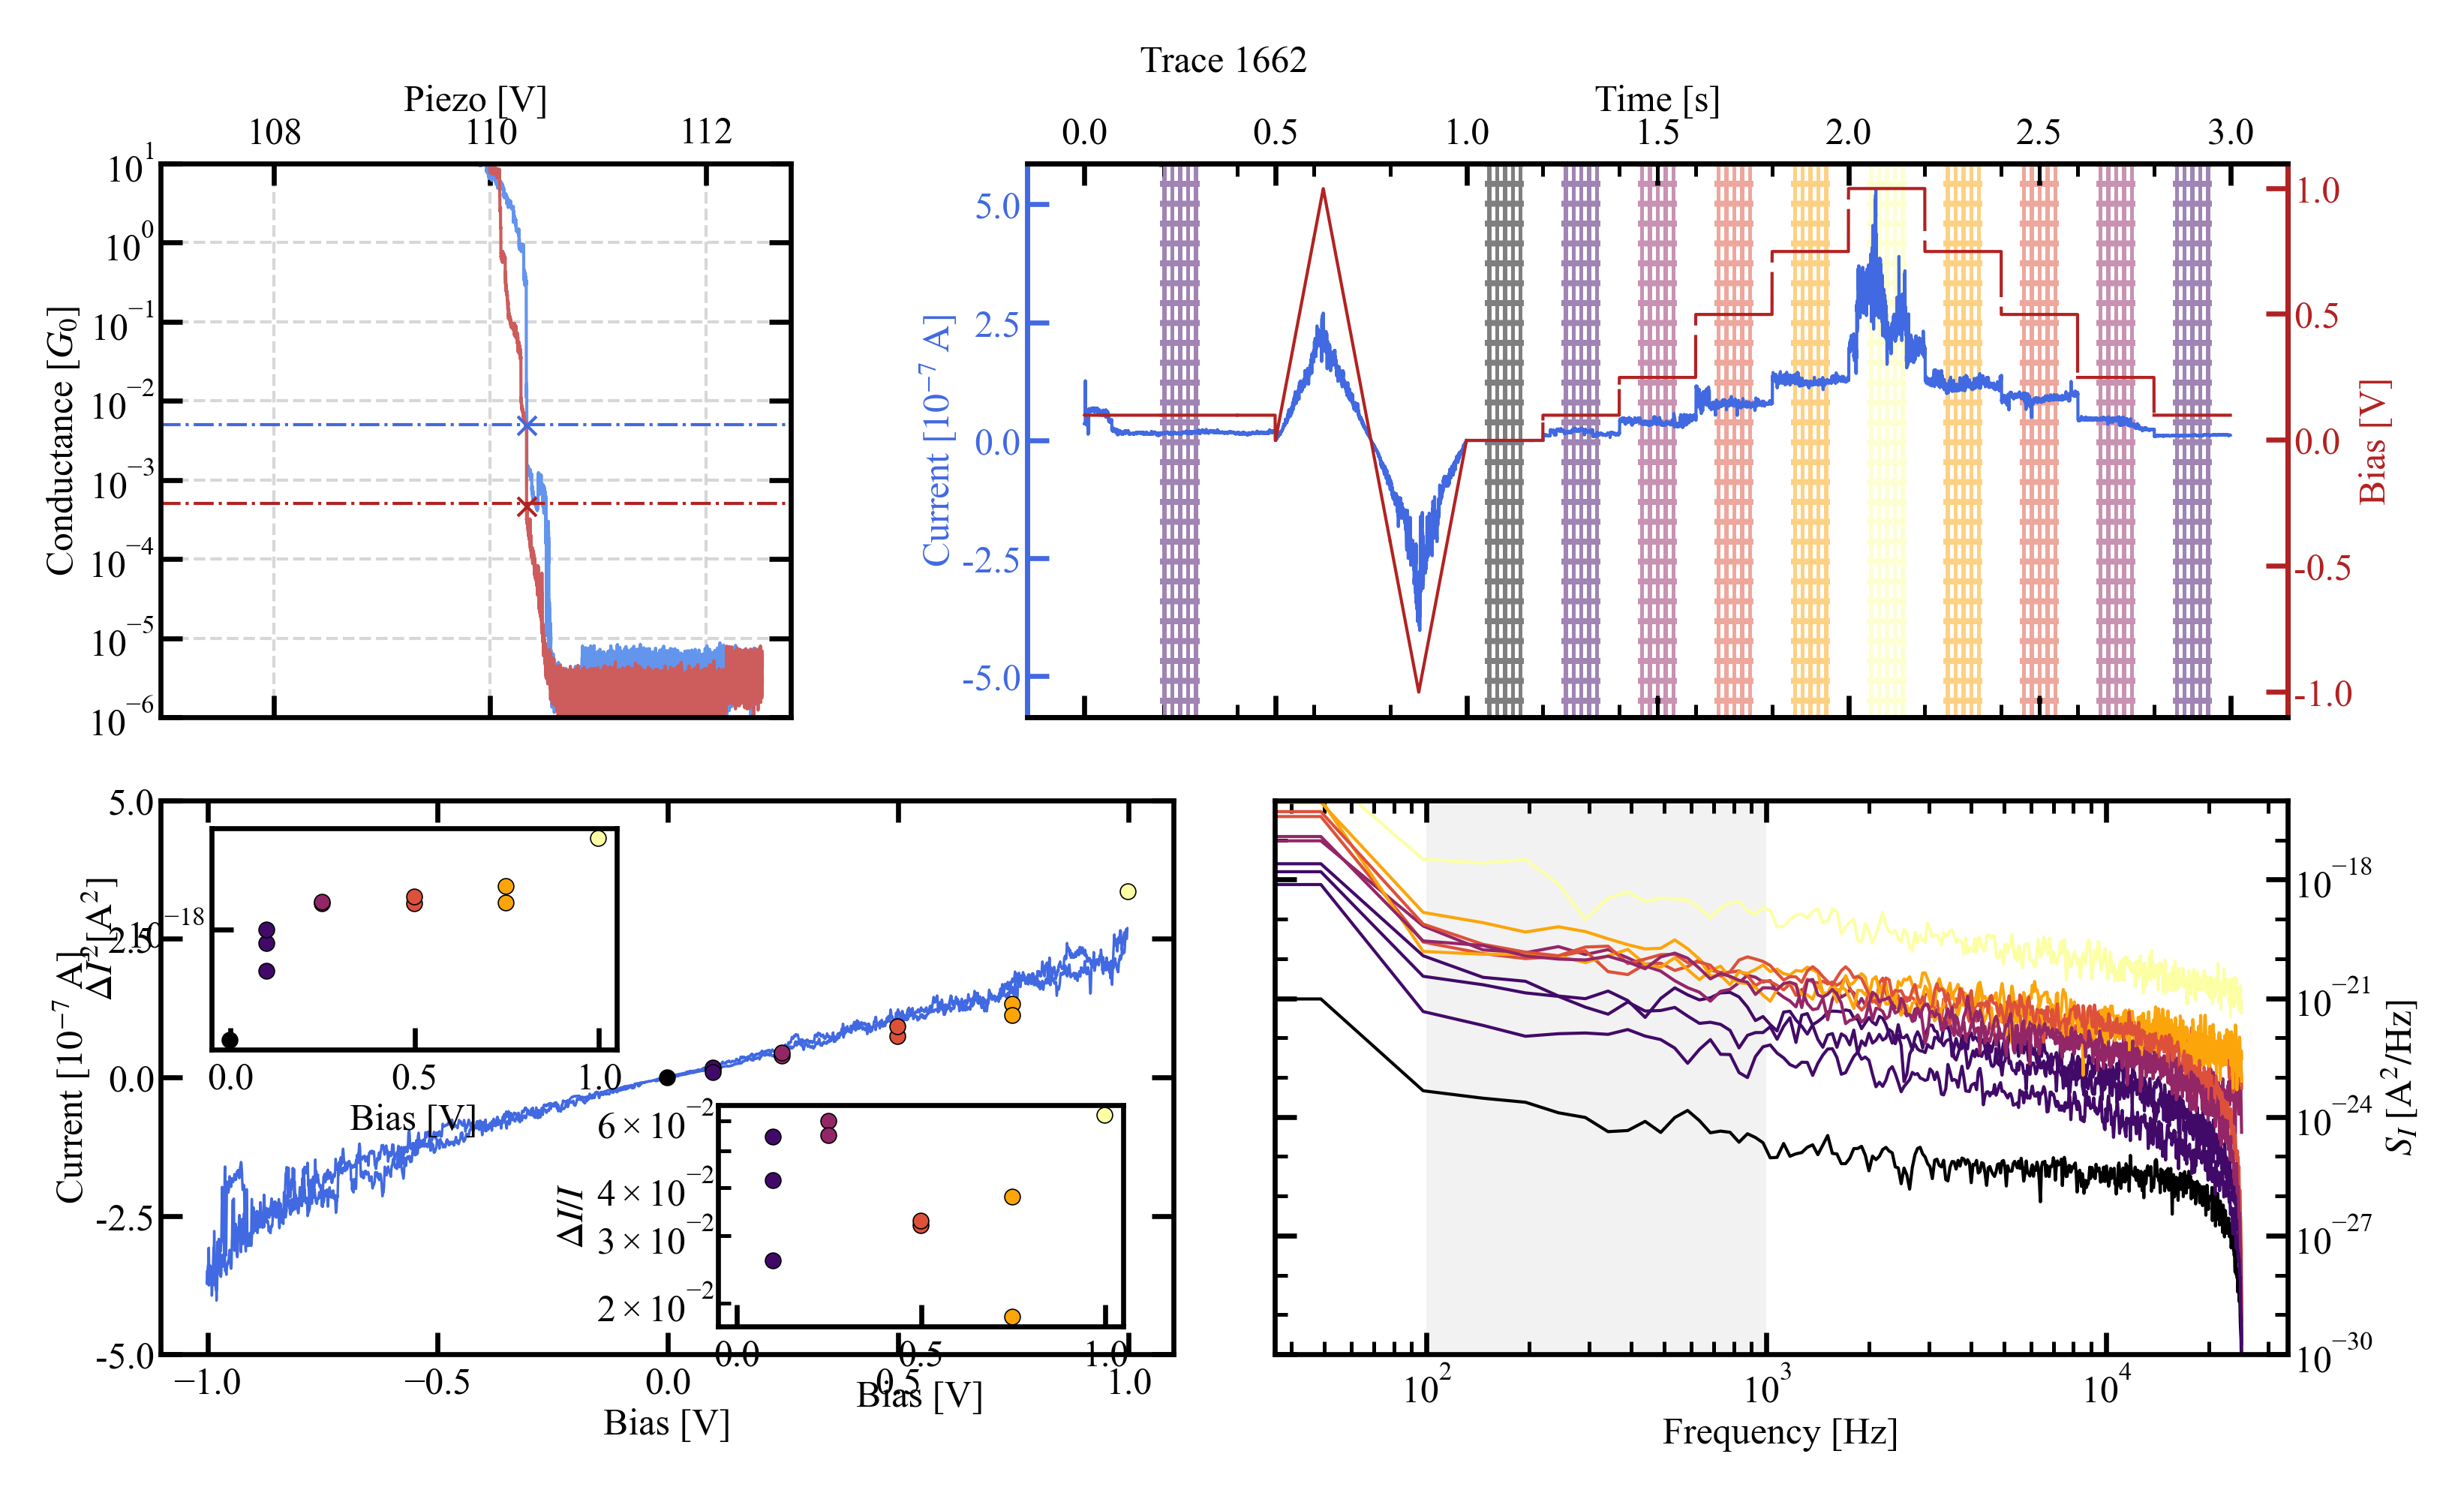

In [43]:
which_trace=1662

hold_trace = HoldTrace(which_trace,
                           load_from=home_folder, bias_offset=0,
                           r_serial_ohm=100300, min_step_len=5_000, min_height=1, iv=0)

trace_pair = TracePair(which_trace, load_from=home_folder)

hold_trace.analyse_hold_trace(num_of_fft=5, subtract_bg=False)

# print(hold_trace.bias_steps.shape)

fig, ax_trace, ax_hold, par_hold, ax_iv, ax_psd = \
    plots.plot_ivs_scheme_one(trace_pair=trace_pair, hold_trace=hold_trace, direction='pull', color_list=my_colors, vline_color='white',
                              smoothing=10, which_psds=None)

ax_noise_1 = ax_iv.inset_axes(bounds=(0.05, 0.55, 0.4, 0.4))
ax_noise_2 = ax_iv.inset_axes(bounds=(0.55, 0.05, 0.4, 0.4))

for i in range(len(my_colors)):
    ax_iv.plot(hold_trace.bias_steps[i], hold_trace.avg_current_on_step_pull[i], marker='o', ls='', ms=2.5, markeredgecolor='k', markeredgewidth=0.2, c=my_colors[i])
    ax_noise_1.plot(hold_trace.bias_steps[i], hold_trace.areas_pull[i], marker='o', ls='', ms=2.5, markeredgecolor='k', markeredgewidth=0.2, c=my_colors[i])
    ax_noise_2.plot(hold_trace.bias_steps[i], hold_trace.current_noise_pull[i], marker='o', ls='', ms=2.5, markeredgecolor='k', markeredgewidth=0.2, c=my_colors[i])

ax_noise_1.set_xlabel('Bias [V]')
ax_noise_2.set_xlabel('Bias [V]')

ax_noise_1.set_ylabel(r'$\Delta I^2 [\mathrm{A}^2]$')
ax_noise_2.set_ylabel(r'$\Delta I/I$')

ax_noise_1.set_yscale('log')
ax_noise_2.set_yscale('log')
    
ax_hold.set_ylim(-1*max(hold_trace.hold_current_pull), max(hold_trace.hold_current_pull))

fig.suptitle(f'Trace {which_trace}', fontsize=6)

Text(0.5, 0.98, 'Trace 3437')

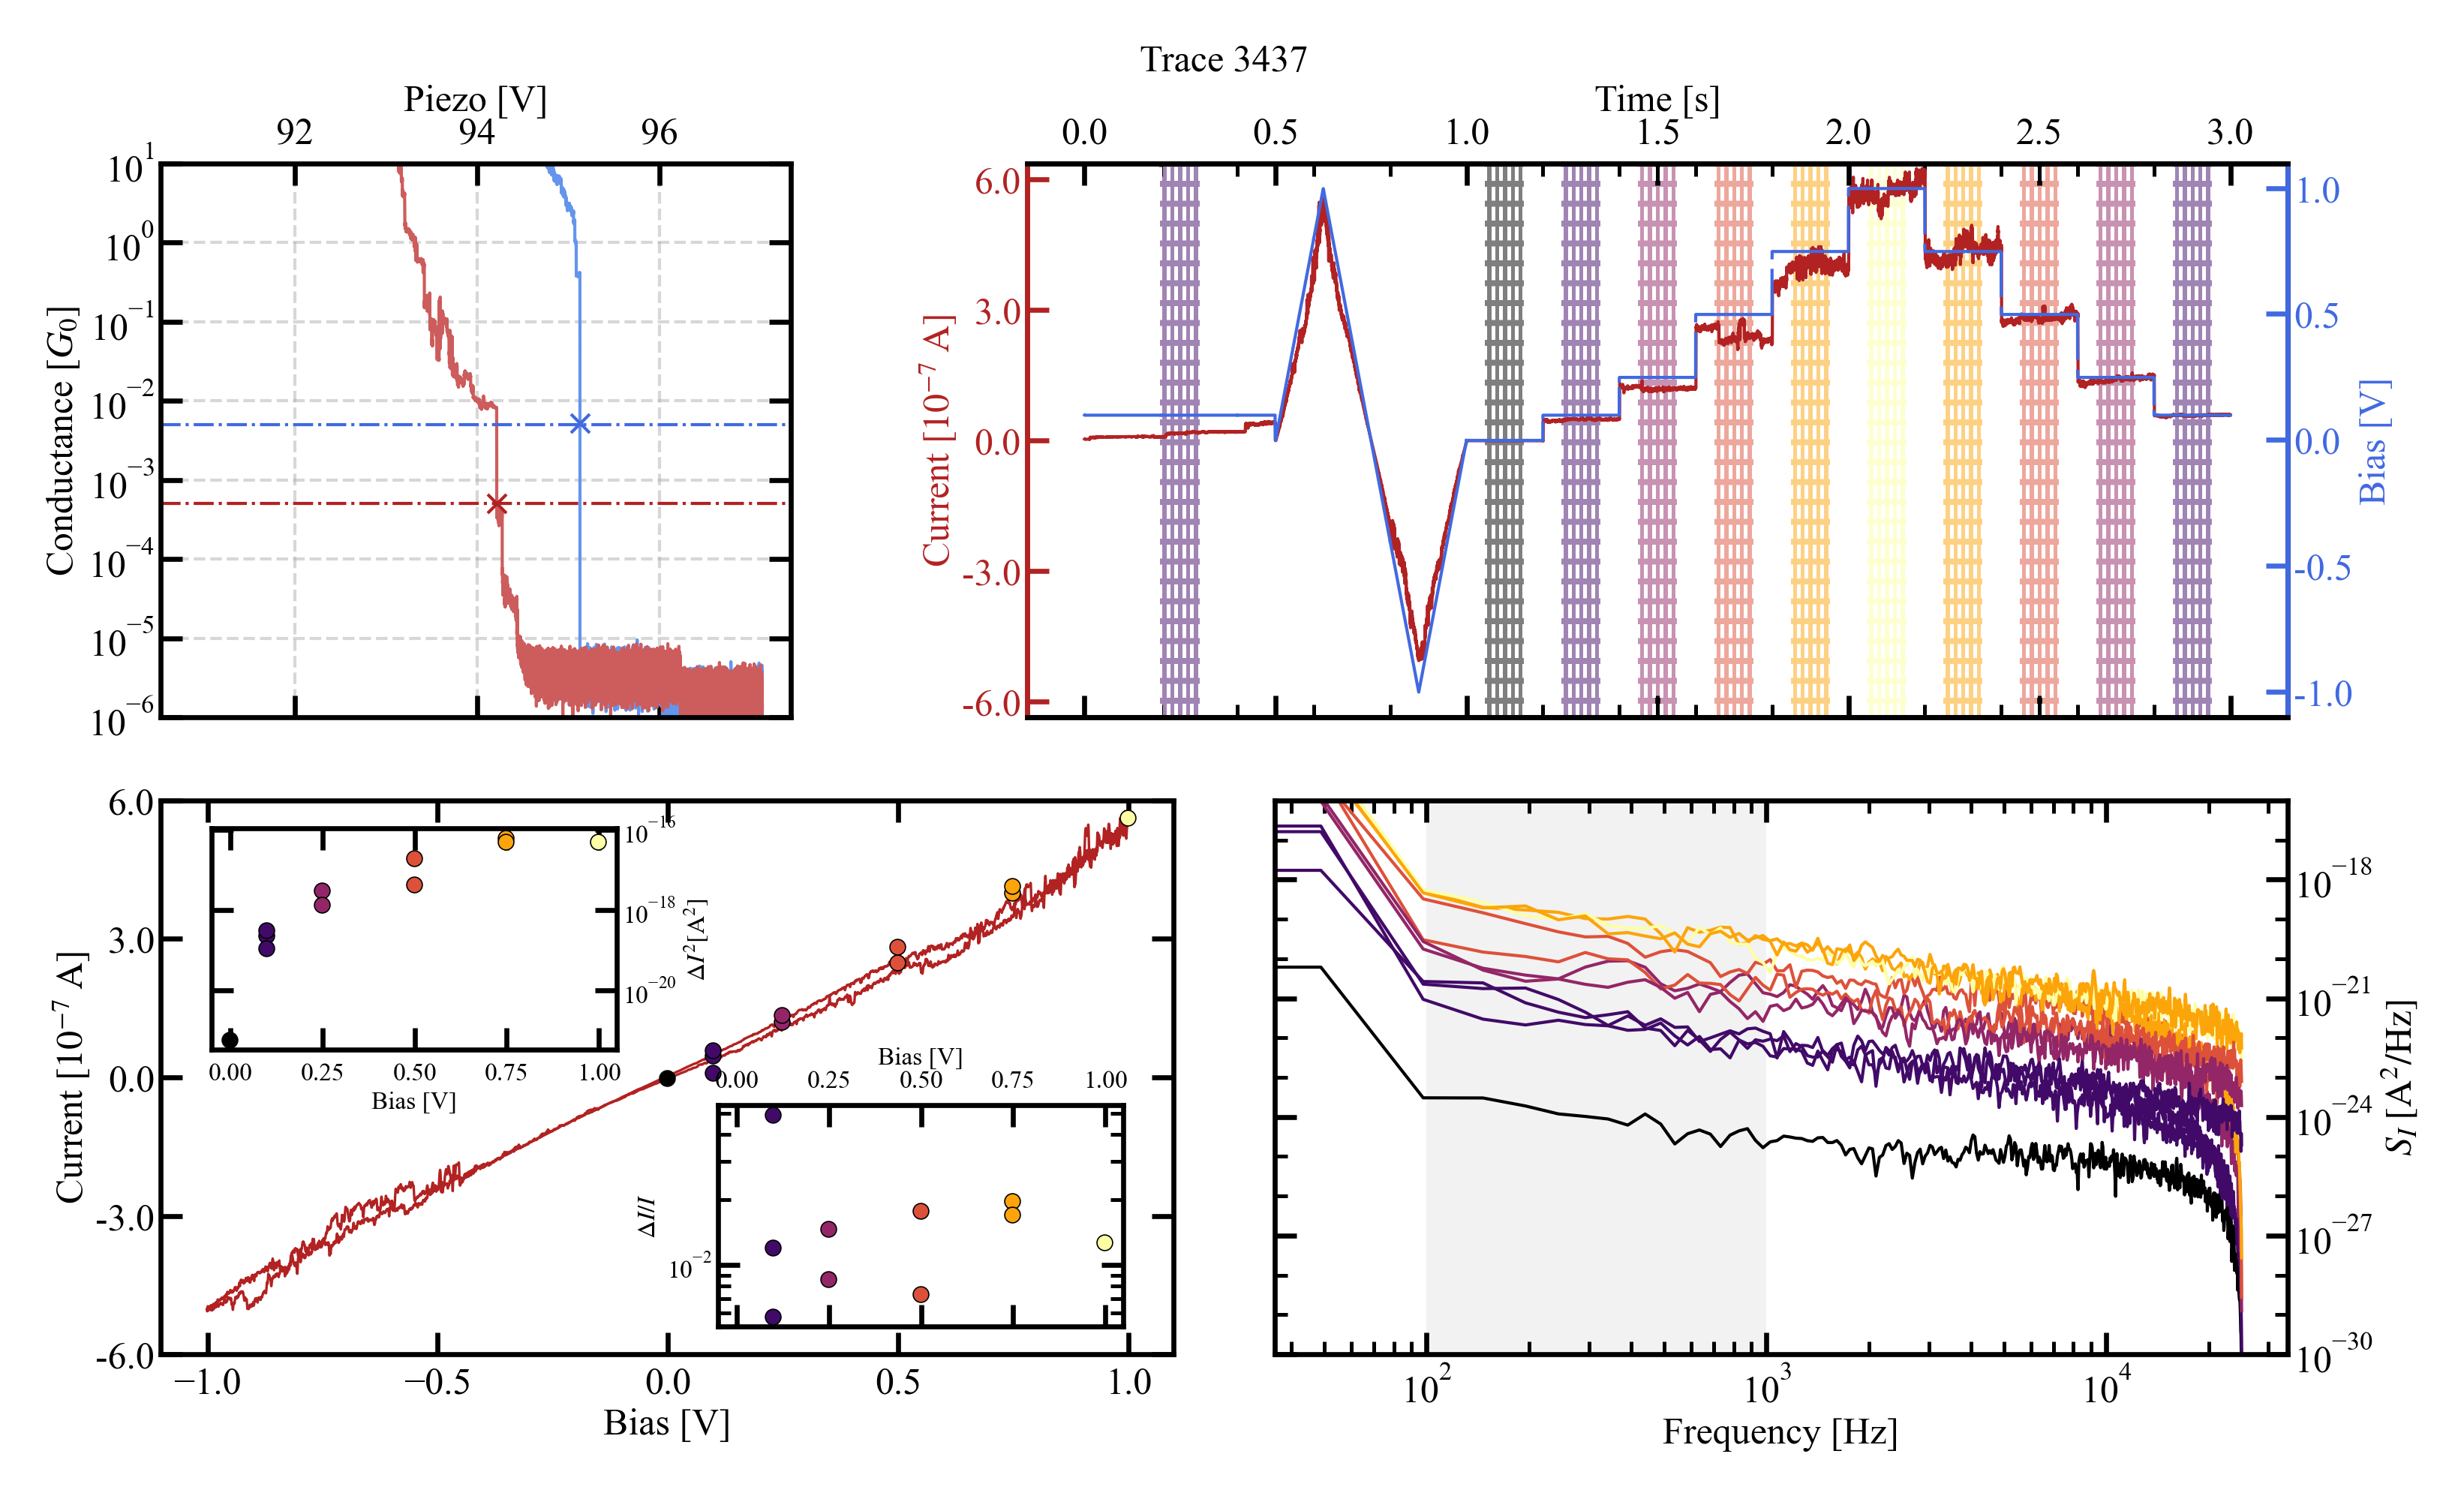

In [50]:
which_trace=3437

hold_trace = HoldTrace(which_trace,
                           load_from=home_folder, bias_offset=0,
                           r_serial_ohm=100300, min_step_len=5_000, min_height=1, iv=0)

trace_pair = TracePair(which_trace, load_from=home_folder)

hold_trace.analyse_hold_trace(num_of_fft=5, subtract_bg=False)

# print(hold_trace.bias_steps.shape)

fig, ax_trace, ax_hold, par_hold, ax_iv, ax_psd = \
    plots.plot_ivs_scheme_one(trace_pair=trace_pair, hold_trace=hold_trace, direction='push', color_list=my_colors, vline_color='white',
                              smoothing=10, which_psds=None)

ax_noise_1 = ax_iv.inset_axes(bounds=(0.05, 0.55, 0.4, 0.4))
ax_noise_2 = ax_iv.inset_axes(bounds=(0.55, 0.05, 0.4, 0.4))

for i in range(len(my_colors)):
    ax_iv.plot(hold_trace.bias_steps[i], hold_trace.avg_current_on_step_push[i], marker='o', ls='', ms=2.5, markeredgecolor='k', markeredgewidth=0.2, c=my_colors[i])
    ax_noise_1.plot(hold_trace.bias_steps[i], hold_trace.areas_push[i], marker='o', ls='', ms=2.5, markeredgecolor='k', markeredgewidth=0.2, c=my_colors[i])
    ax_noise_2.plot(hold_trace.bias_steps[i], hold_trace.current_noise_push[i], marker='o', ls='', ms=2.5, markeredgecolor='k', markeredgewidth=0.2, c=my_colors[i])

ax_noise_1.set_xlabel('Bias [V]', fontsize=4)
ax_noise_2.set_xlabel('Bias [V]', fontsize=4)

ax_noise_1.set_ylabel(r'$\Delta I^2 [\mathrm{A}^2]$', fontsize=4)
ax_noise_2.set_ylabel(r'$\Delta I/I$', fontsize=4)

ax_noise_1.set_yscale('log')
ax_noise_2.set_yscale('log')

ax_noise_1.xaxis.set_ticks_position('both')
ax_noise_1.yaxis.tick_right()
ax_noise_1.yaxis.set_label_position('right')
ax_noise_1.yaxis.set_ticks_position('both')

ax_noise_2.xaxis.tick_top()
ax_noise_2.xaxis.set_label_position('top')
ax_noise_2.xaxis.set_ticks_position('both')
ax_noise_2.yaxis.set_ticks_position('both')

ax_noise_1.tick_params(axis='x', labelsize=4)
ax_noise_1.tick_params(axis='y', labelsize=4)
ax_noise_2.tick_params(axis='x', labelsize=4)
ax_noise_2.tick_params(axis='y', labelsize=4)

ax_hold.set_ylim(-1*max(hold_trace.hold_current_push), max(hold_trace.hold_current_push))

fig.suptitle(f'Trace {which_trace}', fontsize=6)

In [3]:
selected_pull = [2036, 3583, 3595, 3603, 3614]
selected_push = [1918, 4029, 4076, 5576, 6577, 6581, 6595, 6826]

In [50]:
for which_trace in tqdm(selected_pull):

    hold_trace = HoldTrace(which_trace,
                           load_from=home_folder, bias_offset=0,
                           r_serial_ohm=100300, min_step_len=5_000, min_height=1, iv=0)

    trace_pair = TracePair(which_trace, load_from=home_folder)

    hold_trace.analyse_hold_trace(num_of_fft=5, subtract_bg=False)
    hold_trace.save_iv_for_laci(home_folder=home_folder, direction='pull')

    # print(hold_trace.bias_steps.shape)

    fig, ax_trace, ax_hold, par_hold, ax_iv, ax_psd = \
        plots.plot_ivs_scheme_one(trace_pair=trace_pair, hold_trace=hold_trace, direction='pull', color_list=my_colors, vline_color='white',
                                  smoothing=10, which_psds=None)

    ax_noise_1 = ax_iv.inset_axes(bounds=(0.05, 0.55, 0.4, 0.4))
    ax_noise_2 = ax_iv.inset_axes(bounds=(0.55, 0.05, 0.4, 0.4))
    
    scaling_factor = 10**(2*np.log10(hold_trace.bias_steps[hold_trace.bias_steps > 0]))[0] / np.sort(hold_trace.areas_pull[np.bitwise_and(hold_trace.bias_steps>0, hold_trace.bias_steps<0.11)])[1]
    
    ax_noise_1.plot(hold_trace.bias_steps[hold_trace.bias_steps > 0], 10**(2*np.log10(hold_trace.bias_steps[hold_trace.bias_steps > 0]))/scaling_factor, ls='-', lw=0.5, c='k')

    for i in range(len(my_colors)):
        ax_iv.plot(hold_trace.bias_steps[i], hold_trace.avg_current_on_step_pull[i], marker='o', ls='', ms=2.5, markeredgecolor='k', markeredgewidth=0.2, c=my_colors[i])
        ax_noise_1.plot(hold_trace.bias_steps[i], hold_trace.areas_pull[i], marker='o', ls='', ms=2.5, markeredgecolor='k', markeredgewidth=0.2, c=my_colors[i])
        ax_noise_2.plot(hold_trace.bias_steps[i], hold_trace.current_noise_pull[i], marker='o', ls='', ms=2.5, markeredgecolor='k', markeredgewidth=0.2, c=my_colors[i])

    ax_noise_1.set_xlabel('Bias [V]')
    ax_noise_2.set_xlabel('Bias [V]')

    ax_noise_1.set_ylabel(r'$\Delta I^2 [\mathrm{A}^2]$')
    ax_noise_2.set_ylabel(r'$\Delta I/I$')

    ax_noise_1.set_xscale('log')
    ax_noise_1.set_yscale('log')
    ax_noise_2.set_xscale('log')
    ax_noise_2.set_yscale('log')
    
    ax_noise_1.xaxis.set_ticks_position('both')
    ax_noise_1.yaxis.tick_right()
    ax_noise_1.yaxis.set_label_position('right')
    ax_noise_1.yaxis.set_ticks_position('both')

    ax_noise_2.xaxis.tick_top()
    ax_noise_2.xaxis.set_label_position('top')
    ax_noise_2.xaxis.set_ticks_position('both')
    ax_noise_2.yaxis.set_ticks_position('both')
    
    ax_noise_1.set_ylim(10**min(np.floor(np.log10(hold_trace.areas_pull[hold_trace.bias_steps > 0]))), 10**max(np.ceil(np.log10(hold_trace.areas_pull))))


    ax_hold.set_ylim(-1*max(hold_trace.hold_current_pull), max(hold_trace.hold_current_pull))

    fig.suptitle(f'Trace {which_trace}', fontsize=6)
    
    plt.savefig(home_folder.joinpath(f'results/IVs/selected/pull_{which_trace}.png'), bbox_inches='tight')
    plt.close()

    # print(filter_traces.iv_difference(hold_trace, direction='pull', smoothing=100))

  0%|          | 0/5 [00:00<?, ?it/s]

D:\mcbj_stmbj\mcbj.py:2387: MeasurementOverflow: Current overflow during I(V) cycle, in push direction.
  warnings.warn('Current overflow during I(V) cycle, in push direction.', MeasurementOverflow)
D:\mcbj_stmbj\mcbj.py:2387: MeasurementOverflow: Current overflow during I(V) cycle, in push direction.
  warnings.warn('Current overflow during I(V) cycle, in push direction.', MeasurementOverflow)
D:\mcbj_stmbj\mcbj.py:2387: MeasurementOverflow: Current overflow during I(V) cycle, in push direction.
  warnings.warn('Current overflow during I(V) cycle, in push direction.', MeasurementOverflow)
D:\mcbj_stmbj\mcbj.py:2387: MeasurementOverflow: Current overflow during I(V) cycle, in push direction.
  warnings.warn('Current overflow during I(V) cycle, in push direction.', MeasurementOverflow)


In [49]:
print(min(np.floor(np.log10(hold_trace.areas_pull[hold_trace.bias_steps > 0]))))
max(np.ceil(np.log10(hold_trace.areas_pull)))

-20.0


-16.0

In [52]:
for which_trace in tqdm(selected_push):

    hold_trace = HoldTrace(which_trace,
                           load_from=home_folder, bias_offset=0,
                           r_serial_ohm=100300, min_step_len=5_000, min_height=1, iv=0)

    trace_pair = TracePair(which_trace, load_from=home_folder)

    hold_trace.analyse_hold_trace(num_of_fft=5, subtract_bg=False)
    hold_trace.save_iv_for_laci(home_folder=home_folder, direction='push')

    # print(hold_trace.bias_steps.shape)

    fig, ax_trace, ax_hold, par_hold, ax_iv, ax_psd = \
        plots.plot_ivs_scheme_one(trace_pair=trace_pair, hold_trace=hold_trace, direction='push', color_list=my_colors, vline_color='white',
                                  smoothing=10, which_psds=None)

    ax_noise_1 = ax_iv.inset_axes(bounds=(0.05, 0.55, 0.4, 0.4))
    ax_noise_2 = ax_iv.inset_axes(bounds=(0.55, 0.05, 0.4, 0.4))
    
    scaling_factor = 10**(2*np.log10(hold_trace.bias_steps[hold_trace.bias_steps > 0]))[0] / np.sort(hold_trace.areas_push[np.bitwise_and(hold_trace.bias_steps>0, hold_trace.bias_steps<0.11)])[1]
    
    ax_noise_1.plot(hold_trace.bias_steps[hold_trace.bias_steps > 0], 10**(2*np.log10(hold_trace.bias_steps[hold_trace.bias_steps > 0]))/scaling_factor, ls='-', lw=0.5, c='k')

    for i in range(len(my_colors)):
        ax_iv.plot(hold_trace.bias_steps[i], hold_trace.avg_current_on_step_push[i], marker='o', ls='', ms=2.5, markeredgecolor='k', markeredgewidth=0.2, c=my_colors[i])
        ax_noise_1.plot(hold_trace.bias_steps[i], hold_trace.areas_push[i], marker='o', ls='', ms=2.5, markeredgecolor='k', markeredgewidth=0.2, c=my_colors[i])
        ax_noise_2.plot(hold_trace.bias_steps[i], hold_trace.current_noise_push[i], marker='o', ls='', ms=2.5, markeredgecolor='k', markeredgewidth=0.2, c=my_colors[i])

    ax_noise_1.set_xlabel('Bias [V]')
    ax_noise_2.set_xlabel('Bias [V]')

    ax_noise_1.set_ylabel(r'$\Delta I^2 [\mathrm{A}^2]$')
    ax_noise_2.set_ylabel(r'$\Delta I/I$')

    ax_noise_1.set_xscale('log')
    ax_noise_1.set_yscale('log')
    ax_noise_2.set_xscale('log')
    ax_noise_2.set_yscale('log')
    
    ax_noise_1.xaxis.set_ticks_position('both')
    ax_noise_1.yaxis.tick_right()
    ax_noise_1.yaxis.set_label_position('right')
    ax_noise_1.yaxis.set_ticks_position('both')

    ax_noise_2.xaxis.tick_top()
    ax_noise_2.xaxis.set_label_position('top')
    ax_noise_2.xaxis.set_ticks_position('both')
    ax_noise_2.yaxis.set_ticks_position('both')
    
    
    ax_noise_1.set_ylim(10**min(np.floor(np.log10(hold_trace.areas_push[hold_trace.bias_steps > 0]))), 10**max(np.ceil(np.log10(hold_trace.areas_push))))

    ax_hold.set_ylim(-1*max(hold_trace.hold_current_push), max(hold_trace.hold_current_push))

    fig.suptitle(f'Trace {which_trace}', fontsize=6)
    
    plt.savefig(home_folder.joinpath(f'results/IVs/selected/push_{which_trace}.png'), bbox_inches='tight')
    plt.close()

    # print(filter_traces.iv_difference(hold_trace, direction='push', smoothing=100))

  0%|          | 0/8 [00:00<?, ?it/s]

In [33]:
10**(2*np.log10(hold_trace.bias_steps[hold_trace.bias_steps > 0]))

array([0.0096052 , 0.0096052 , 0.061504  , 0.24800397, 0.55950403,
       0.99600405, 0.55950403, 0.24800397, 0.061504  , 0.0096052 ],
      dtype=float32)

In [38]:
10**(2*np.log10(hold_trace.bias_steps[np.bitwise_and(hold_trace.bias_steps>0, hold_trace.bias_steps<0.11)]))[1] / np.sort(hold_trace.avg_current_on_step_pull[np.bitwise_and(hold_trace.bias_steps>0, hold_trace.bias_steps<0.11)])[1]

3891877.495006979